机器翻译是序列转换模型的一个核心问题，其输入和输出都是长度可变的序列。为了处理这种类型的输入和输出，我们可以设计一个包含两个主要组件的架构：第一个组件是一个编码器（encoder）：它接受一个长度可变的序列作为输入，并将其转换为具有固定形状的编码状态。第二个组件是解码器（decoder）：它将固定形状的编码状态映射到长度可变的序列。这被称为编码器-解码器（encoder‐decoder）架构，如图9.6.1所示。
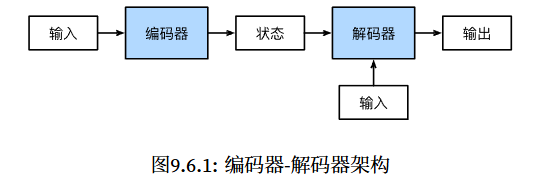

In [1]:
from torch import nn

#@save
class Encoder(nn.Module):
    """编码器-解码器架构的基本编码器接口"""
    def __init__(self,**kwargs):
        super(Encoder,self).__init__(**kwargs)
    def forward(self,X,*args):
        raise NotImplementedError
#raise 是 Python 中用于主动抛出异常的关键字。它的作用是：告诉程序“这里出问题了”，并中断当前流程，从而进入异常处理逻辑，或者直接报错退出。

在下面的解码器接口中，我们新增一个init_state函数，用于将编码器的输出（enc_outputs）转换为编码后的状态。注意，此步骤可能需要额外的输入，例如：输入序列的有效长度，这在 9.5.4节中进行了解释。为了逐个地生成长度可变的词元序列，解码器在每个时间步都会将输入（例如：在前一时间步生成的词元）和编码后的状态映射成当前时间步的输出词元。

In [2]:
#@save
class Decoder(nn.Module):
    """编码器-解码器结构的基本解码器接口"""
    def __init__(self,**kwargs):
        super(Decoder,self).__init__(**kwargs)
    def init_state(self,enc_outputs,*args):
        raise NotImplementedError
    def forward(self,X,state):
        raise NotImplementedError

In [3]:
#总而言之，“编码器‐解码器”架构包含了一个编码器和一个解码器，并且还拥有可选的额外的参数。在前向传播中，编码器的输出用于生成编码状态，这个状态又被解码器作为其输入的一部分
#@save
class EncoderDecoder(nn.Module):
    """编码器-解码器架构的基类"""
    def __init__(self,encoder,decoder,**kwargs):
        super(EncoderDecoder,self).__init__(**kwargs)
        self.encoder=encoder
        self.decoder=decoder
    def forward(self,enc_X,dec_X,*args):
        enc_outputs=self.encoder(enc_X,*args)
        dec_state=self.decoder.init_state(enc_outputs,*args)
        return self.decoder(dec_X,dec_state)

小结
- “编码器－解码器”架构可以将长度可变的序列作为输入和输出，因此适用于机器翻译等序列转换问题。
- 编码器将长度可变的序列作为输入，并将其转换为具有固定形状的编码状态。
- 解码器将具有固定形状的编码状态映射为长度可变的序列。